# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. 
* Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
* Please report/illustrate important features of the demand, such as daily cycles. 
* If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
logins = pd.read_json('./ultimate_challenge/logins.json')
print(logins['login_time'].dtypes)
logins

datetime64[ns]


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
# no missing data 
null = logins.isnull().sum()
null

login_time    0
dtype: int64

In [4]:
# set index to the time series
logins = logins.set_index('login_time')
type(logins)

pandas.core.frame.DataFrame

In [5]:
logins['count'] = 1
logins

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [6]:
logins_15 = logins.resample('15T').count()
logins_15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


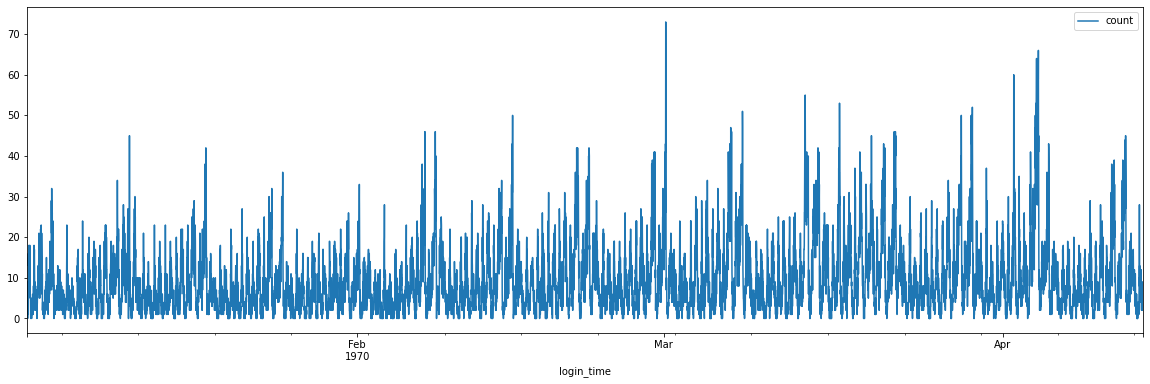

In [7]:
# there don't appear to be any missing chunks of time 
fig, ax = plt.subplots(figsize=(20, 6))
logins_15.plot(ax=ax)
plt.show()

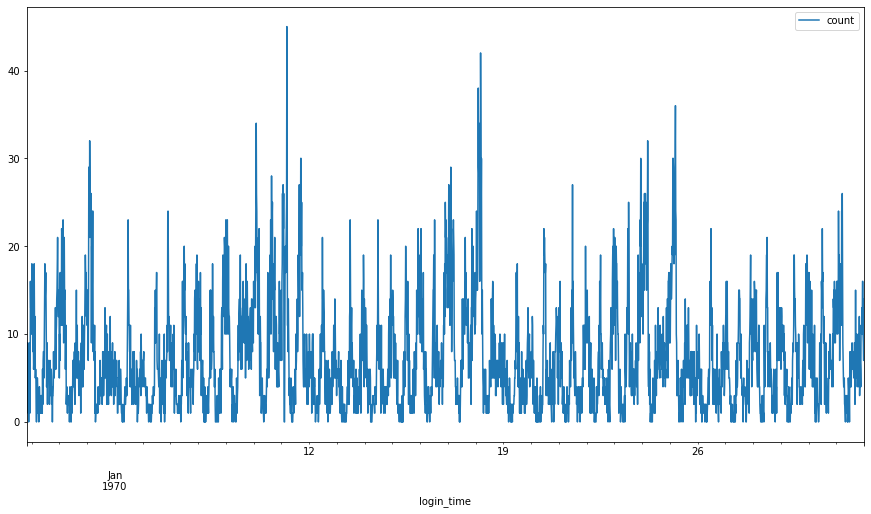

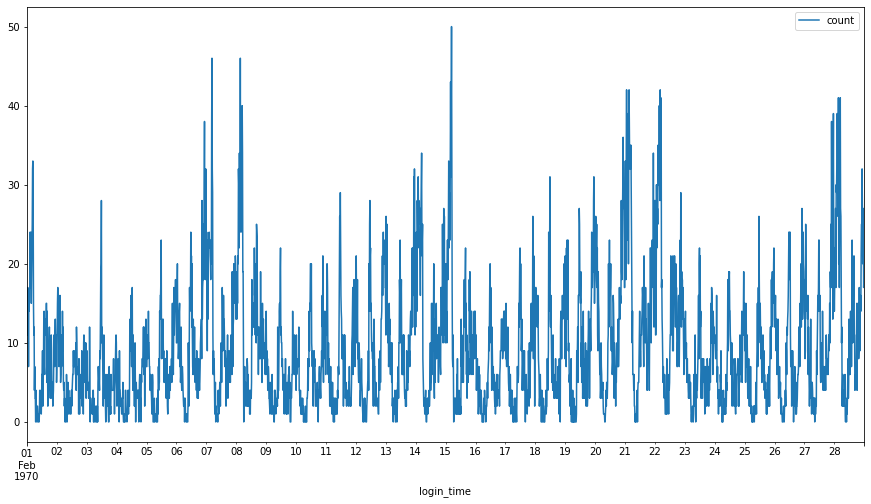

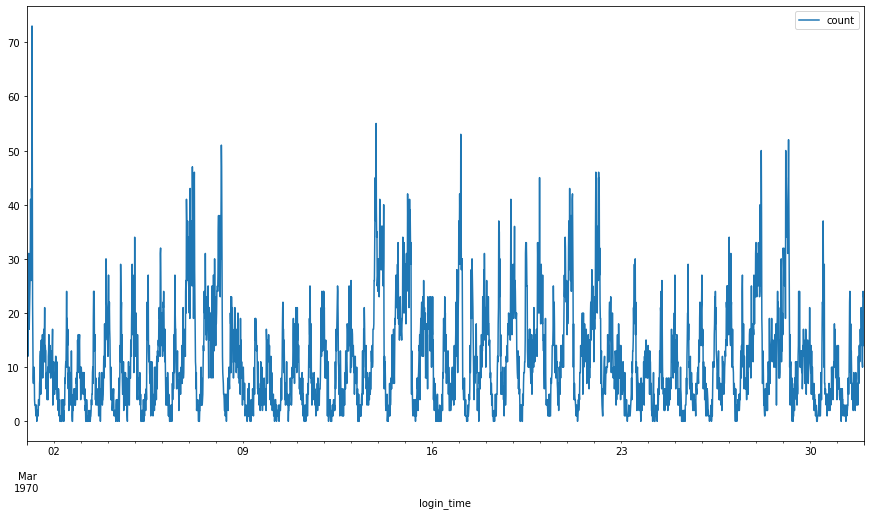

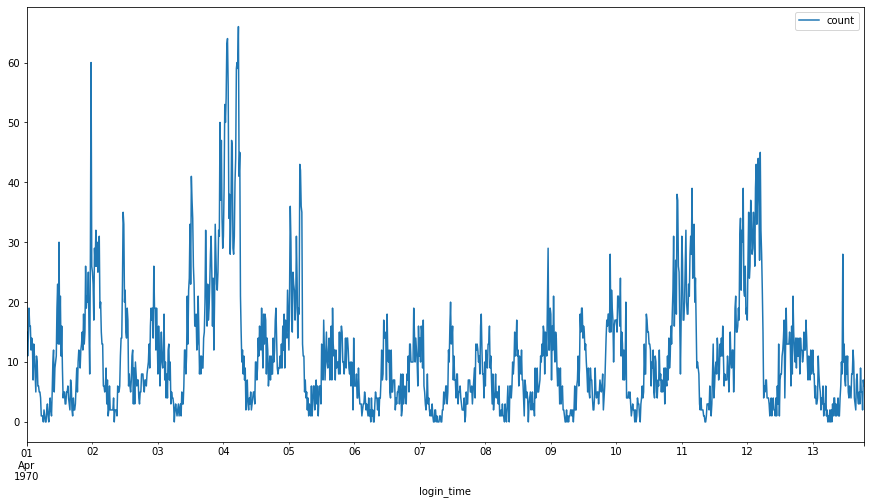

In [8]:
january = logins_15.loc['1970-01']
february = logins_15.loc['1970-02']
march = logins_15.loc['1970-03']
april = logins_15.loc['1970-04']

months = [january, february, march, april]

for month in months:
    fig, ax = plt.subplots(figsize=(15, 8))
    month.plot(ax=ax)

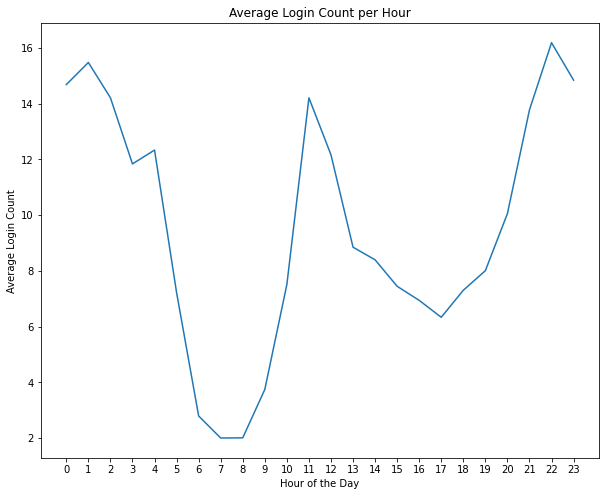

In [13]:
# Calculate the average login counts per hour
average_hourly = logins_15.groupby(logins_15.index.hour)['count'].mean()

# Create a time series for the x-axis representing the hours of the day
hours = range(24)

# Plot the average login counts per hour
plt.figure(figsize=(10, 8))
plt.plot(hours, average_hourly)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Login Count')
plt.title('Average Login Count per Hour')

# Set the x-axis ticks to show all 24 hours
plt.xticks(range(0, 24))
plt.show();